### Question 1

In [57]:
import numpy as np
import matplotlib.pyplot as plt

### Setup

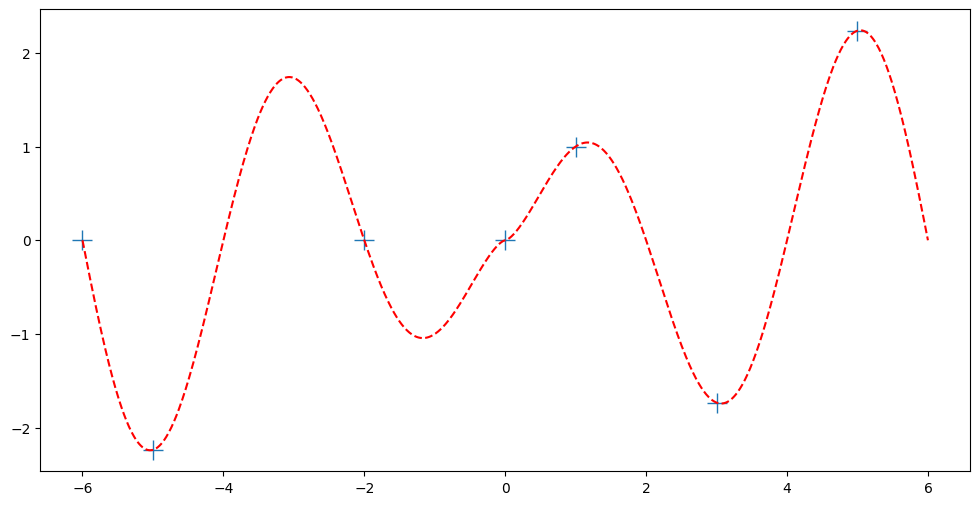

In [58]:
# original function
def f(x):
    return np.sqrt(np.abs(x))*np.sin(((np.pi)/2)*x)

# centroid
centroid = np.array([-6, -5, -2, 0, 1, 3, 5])
# dataset 
x = np.linspace(-6, 6, 1000)
# target
y = np.zeros(1000)
for i in range(len(x)):
    y[i] = f(x[i])
    
plt.figure(figsize=(12, 6))
plt.plot(centroid ,f(centroid), '+', markersize=15)
plt.plot(x, y, '--r')

### RBF Interporlator on Guassian Kernel

In [59]:
class RBFInterpolator():
    # inititalization function, numCenters is the number of Centers, centers if given, and spread of the function sigma.
    def __init__(self, inpdim, outpdim, numCenters, centers, spread):
        self.inpdim = inpdim
        self.outpdim = outpdim
        self.numCenters = numCenters
        #initialize random weight function
        self.W = np.random.random((self.numCenters, self.outpdim))       
        #initialize centers
        self.C = centers
        #calculate initial spread (sigma)
        self.sigma = spread

    # gaussian basis function
    def _gaussBasisFunc(self, center, x):
        return np.exp(-((np.linalg.norm(x-center)**2) / 2*(self.sigma**2)))
    
    # function for calculating activation
    def _calculateActivation(self, X):
        # create the matrix of activations.
        # First initialize with zeros
        # Activation matrix will have dimension (number of rows in train * num_centers)
        G = np.zeros((X.shape[0], self.numCenters), float)
        
        # loop over all the centers and inputs
        for center_index, center in enumerate(self.C):
            for x_index, x in enumerate(X):

                # calculate activations and store in appropriate (input, center) cell
                G[x_index, center_index] = self._gaussBasisFunc(center, x)
        
        return G            
    
    # function for training
    def fit(self, X, y):
        
        # calculating the activations for input data
        G = self._calculateActivation(X)
        
        # Calculate the weights
        self.W = np.dot(np.linalg.pinv(G), y)
        
        return self
    

    # function for testing
    def predict(self, X):

        # do the forward pass : calculate activations and dot product with weights to get output
        G = self._calculateActivation(X)
        output = np.dot(G, self.W)

        return output

### 1.a

I assumed the 6 datapoints given as the centroid of RBFs and generated 1000 random data points using f(x) and used them as the training samples. 

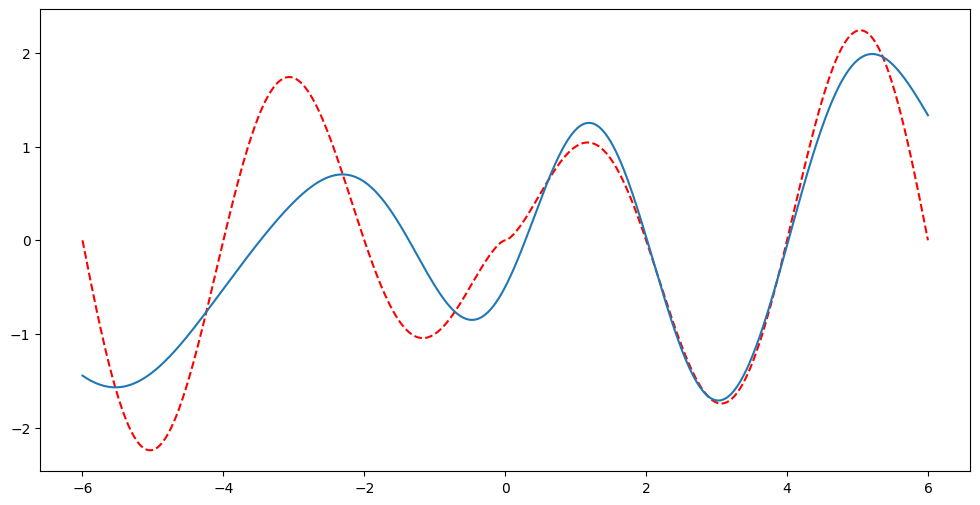

In [60]:
# sigma = 1
interp = RBFInterpolator(inpdim=1, outpdim=1, numCenters=len(centroid), centers=centroid, spread=1)
interp.fit(x, y)
interp.predict(X = np.linspace(-6, 6, 1000))

plt.figure(figsize=(12,6))
plt.plot(x, f(x), '--r')
plt.plot(x, interp.predict(X = np.linspace(-6, 6, 1000)))



### 1.b

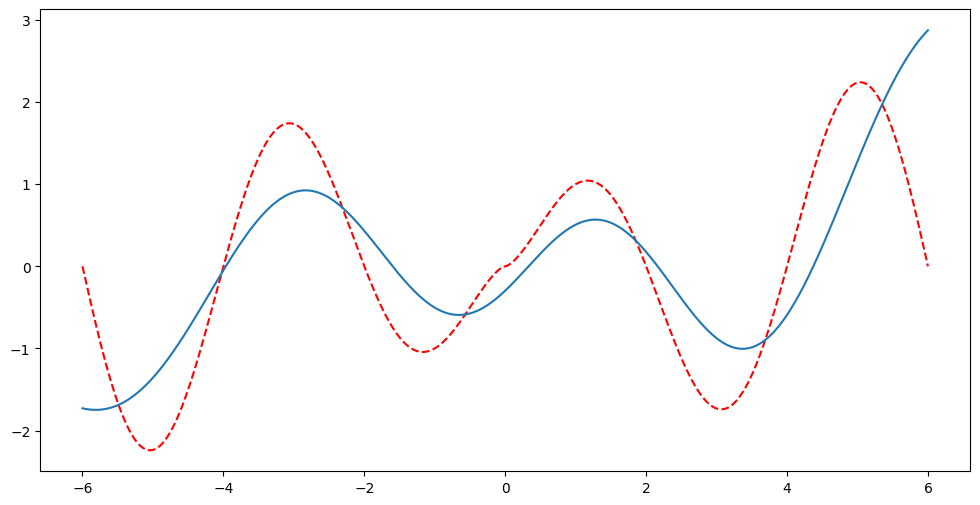

In [61]:
# sigma = 0.5
interp = RBFInterpolator(inpdim=1, outpdim=1, numCenters=len(centroid), centers=centroid, spread=0.5)
interp.fit(x, y)
interp.predict(X = np.linspace(-6, 6, 1000))

plt.figure(figsize=(12,6))
plt.plot(x, f(x), '--r')
plt.plot(x, interp.predict(X = np.linspace(-6, 6, 1000)))

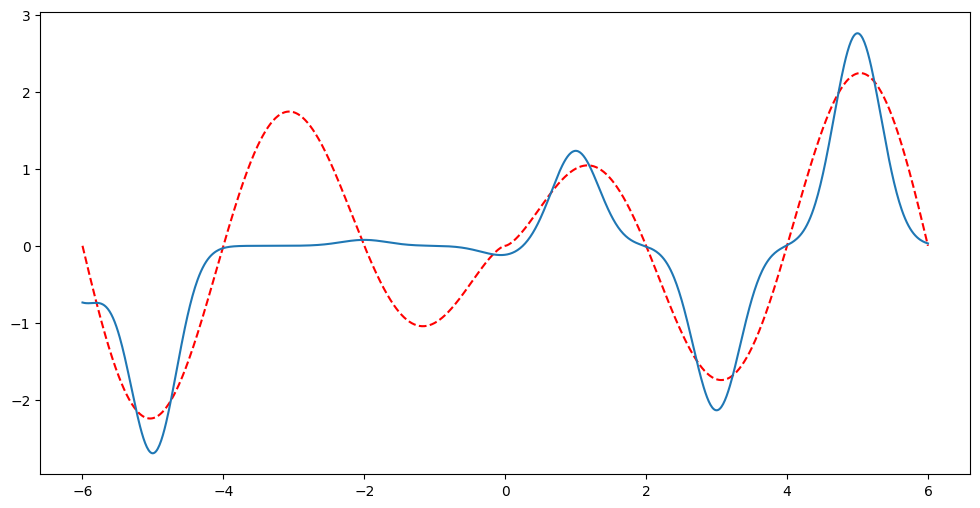

In [62]:
# sigma = 3
interp = RBFInterpolator(inpdim=1, outpdim=1, numCenters=len(centroid), centers=centroid, spread=3)
interp.fit(x, y)
interp.predict(X = np.linspace(-6, 6, 1000))

plt.figure(figsize=(12,6))
plt.plot(x, f(x), '--r')
plt.plot(x, interp.predict(X = np.linspace(-6, 6, 1000)))

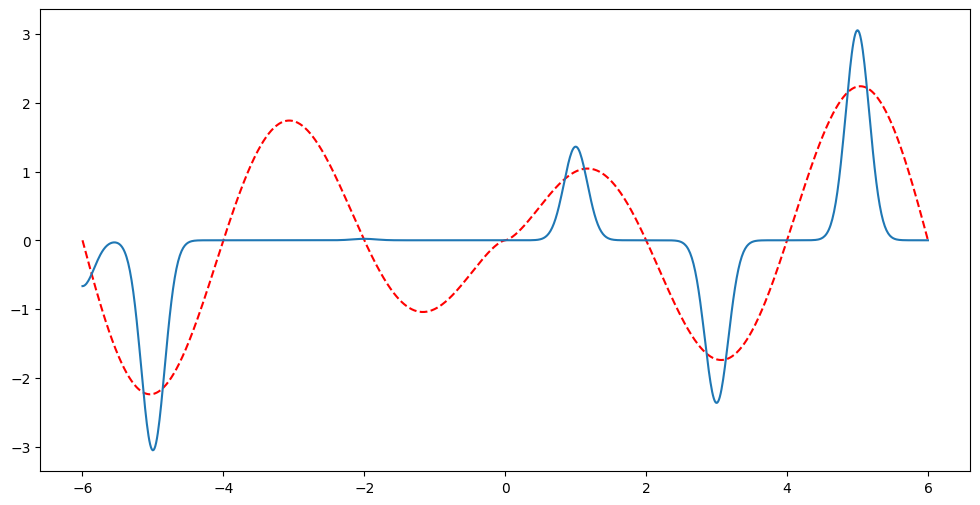

In [63]:
# sigma = 6
interp = RBFInterpolator(inpdim=1, outpdim=1, numCenters=len(centroid), centers=centroid, spread=6)
interp.fit(x, y)
interp.predict(X = np.linspace(-6, 6, 1000))

plt.figure(figsize=(12,6))
plt.plot(x, f(x), '--r')
plt.plot(x, interp.predict(X = np.linspace(-6, 6, 1000)))

### 1.c

From the above trial we can see that the width of the function plays a major importance in the accuracy of the interpolator. Overall we see that using the sigma value of 1 gives the most accurate interpolation of the original function. In one hand using the value of 0.5 shows slightly less accuracy likely because the spread is too small to doesn't provide for a good interpolation of the function in between the sample data. On the other hand using the value of 3 and 6 provides very inaccurate result. likely because many information is being lost when the range of the radial function are larger than the original range of the function which only rangs from around -2 and 2. 